# Cardiovascular Disease vs Determinants

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Resource files
CD_data_path = "Cardiovascular_Disease_Data.csv"
census_data_path = "2018_Census_Data.csv"

# Read the Cardiovascular Disease data and Census data
CD_data = pd.read_csv(CD_data_path, low_memory=False)
census_data = pd.read_csv(census_data_path, low_memory=False)

# State name to abbreviated version
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# Cleaning Cardiovascular Data
CD_data = CD_data[CD_data["Year"]=="2018"] # Grabbing rows with the Year 2018 only
CD_data = CD_data[["Year", 
                   "LocationAbbr", 
                   "LocationDesc", 
                   "Topic", 
                   "Data_Value", 
                   "Stratification1"]] # Grabbing relevant columns
CD_data.columns = ["Year", 
                   "State", 
                   "County", 
                   "Disease Type", 
                   "Mortality per 100k", 
                   "Age Group"] # Renaming columns
CD_data["County, State"] = CD_data["County"] + " County, " + CD_data["State"] # Create a column that will be used to merge with other dataset
CD_data = CD_data[["Year", "County, State", "State", "Disease Type", "Mortality per 100k", "Age Group"]]

# Cleaning Census Data
census_data = census_data[["STATE",
                           "COUNTY",
                           "ACS_MEDIAN_HH_INC",
                           "ACS_PCT_COLLEGE_ASSOCIATE_DGR",
                           "ACS_PCT_BACHELOR_DGR",
                           "ACS_PCT_GRADUATE_DGR",
                           "ACS_PCT_HS_GRADUATE",
                           "ACS_PCT_LT_HS",
                           "ACS_PCT_MEDICARE_ONLY",
                           "ACS_PCT_PRIVATE_ANY",
                           "ACS_PCT_UNINSURED"]] # Grabbing relevant columns
census_data.columns = ["State",
                       "County",
                       "County Median Income",
                       "% College/Associate's Degree",
                       "% Bachelor Degree",
                       "% Graduate Degree",
                       "% Only HS Degree",
                       "% less than a HS Degree",
                       "% Medicare Only",
                       "% Private Insurance Only",
                       "% Uninsured"] # Renaming columns
census_data["County, State"] = census_data["County"] + ", " + census_data["State"].replace(us_state_to_abbrev) # Create a column that will be used to merge with other dataset
census_data = round(census_data.groupby("County, State").mean(), 3) # Average rows with same counties

df = pd.merge(CD_data, census_data, how = "left", left_on = "County, State", right_index = True).dropna(axis=0) # Merging cardiovascular data and census data
df_state_income = df.groupby("State")["County Median Income"].mean().rename("State Average Median Income") # Finding median income by state
df = pd.merge(df, df_state_income, how = "left", left_on = "State", right_index = True) # Adding column to main dataframe
df

C:\Users\ljm47\AppData\Local\Temp\ipykernel_3664\1601870111.py:117: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  census_data = round(census_data.groupby("County, State").mean(), 3) # Average rows with same counties


,Year,"County, State",State,Disease Type,Mortality per 100k,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured,State Average Median Income
21,2018,"Autauga County, AL",AL,Stroke,23.5,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979,41685.122448
42,2018,"Autauga County, AL",AL,Coronary Heart Disease,87.9,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979,41685.122448
62,2018,"Autauga County, AL",AL,Stroke,368.6,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979,41685.122448
82,2018,"Autauga County, AL",AL,Coronary Heart Disease,689.9,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979,41685.122448
115,2018,"Baldwin County, AL",AL,Stroke,18.1,Ages 35-64 years,56782.71,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276,41685.122448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288419,2018,"Washakie County, WY",WY,Coronary Heart Disease,436.8,Ages 65 years and older,53835.00,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430,60250.766391
288421,2018,"Weston County, WY",WY,Coronary Heart Disease,58.3,Ages 35-64 years,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325,60250.766391
288440,2018,"Weston County, WY",WY,Stroke,236.5,Ages 65 years and older,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325,60250.766391
288460,2018,"Weston County, WY",WY,Coronary Heart Disease,592.8,Ages 65 years and older,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325,60250.766391


## Exploratory Data Analysis (EDA)

### Summary Statistics for Mortality Rate by Age Group and Disease Type

In [36]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
]

df_stats = df.groupby(["Disease Type", "Age Group"])["Mortality per 100k"].agg(func=stats) # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats



Mean  Median  \
Disease Type           Age Group                                     
Coronary Heart Disease Ages 35-64 years          70.898076    64.2   
                       Ages 65 years and older  628.655387   605.9   
Stroke                 Ages 35-64 years          16.864551    15.3   
                       Ages 65 years and older  267.846506   262.2   

                                                       Std  Minimum  Maximum  
Disease Type           Age Group                                              
Coronary Heart Disease Ages 35-64 years          31.149991     13.3    300.7  
                       Ages 65 years and older  175.914496    207.1   1609.8  
Stroke                 Ages 35-64 years           6.306468      5.6     48.1  
                       Ages 65 years and older   48.985936    107.9    596.4

### Distribution of Mortality Rate by Age Group and Disease Type

#### Disease Type: Coronary Heart Disease

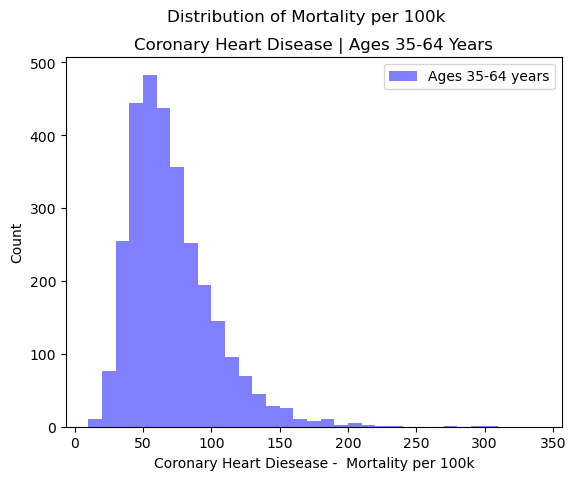

In [37]:
# Ages 35-64 years
bins = list(range(10, 350, 10))
plt.hist(df[(df["Age Group"] == "Ages 35-64 years") & (df["Disease Type"] == "Coronary Heart Disease")]["Mortality per 100k"], bins, alpha = 0.5, color = "blue", label = "Ages 35-64 years")
plt.xlabel("Coronary Heart Diesease -  Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Coronary Heart Disease | Ages 35-64 Years")
plt.legend()

plt.show()

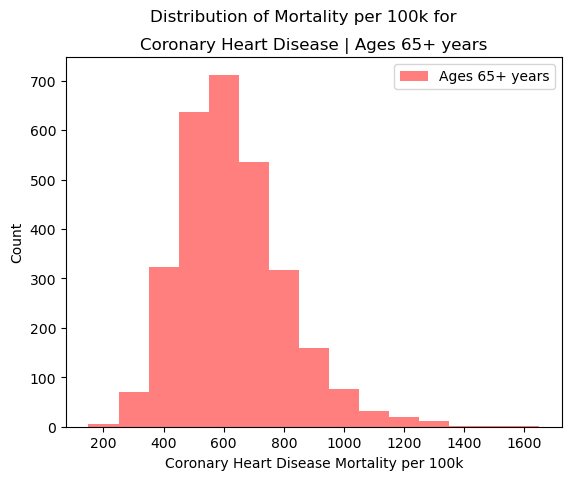

In [38]:
# Ages 65+ years
bins = list(range(150, 1750, 100))
plt.hist(df[(df["Age Group"] == "Ages 65 years and older") & (df["Disease Type"] == "Coronary Heart Disease")]["Mortality per 100k"], bins, alpha = 0.5, color = "red", label = "Ages 65+ years")
plt.xlabel("Coronary Heart Disease Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k for ")
plt.title("Coronary Heart Disease | Ages 65+ years")
plt.legend()



plt.show()

#### Disease Type: STROKE

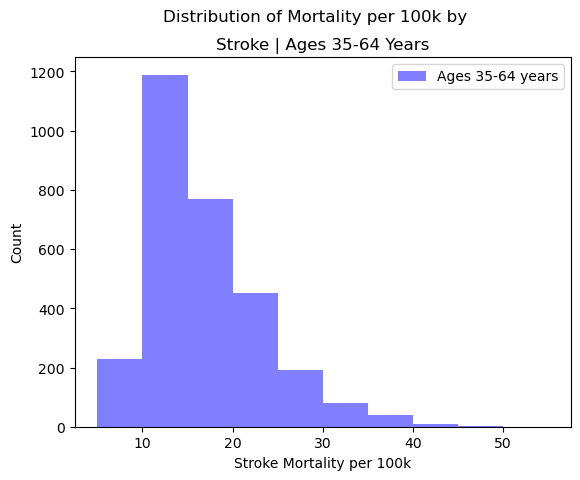

In [39]:
# Ages 35-64 years
bins = list(range(5, 60, 5))
plt.hist(df[(df["Age Group"] == "Ages 35-64 years") & (df["Disease Type"] == "Stroke")]["Mortality per 100k"], bins, alpha = 0.5, color = "blue", label = "Ages 35-64 years")
plt.xlabel("Stroke Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k by")
plt.title("Stroke | Ages 35-64 Years")
plt.legend()
plt.show()

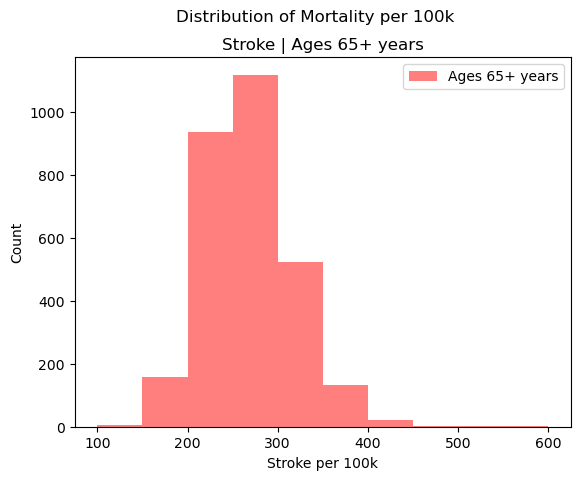

In [41]:
# Ages 65+ years
bins = list(range(100, 650, 50))
plt.hist(df[(df["Age Group"] == "Ages 65 years and older") & (df["Disease Type"] == "Stroke")]["Mortality per 100k"], bins, alpha = 0.5, color = "red", label = "Ages 65+ years")
plt.xlabel("Stroke per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Stroke | Ages 65+ years")
plt.legend()
plt.show()

In [42]:
df

,Year,"County, State",State,Disease Type,Mortality per 100k,Age Group,County Median Income,% College/Associate's Degree,% Bachelor Degree,% Graduate Degree,% Only HS Degree,% less than a HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured,State Average Median Income
21,2018,"Autauga County, AL",AL,Stroke,23.5,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979,41685.122448
42,2018,"Autauga County, AL",AL,Coronary Heart Disease,87.9,Ages 35-64 years,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979,41685.122448
62,2018,"Autauga County, AL",AL,Stroke,368.6,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979,41685.122448
82,2018,"Autauga County, AL",AL,Coronary Heart Disease,689.9,Ages 65 years and older,55499.25,27.581,14.787,9.861,34.810,12.962,5.658,57.621,7.979,41685.122448
115,2018,"Baldwin County, AL",AL,Stroke,18.1,Ages 35-64 years,56782.71,30.155,19.429,10.212,29.693,10.512,7.462,59.858,10.276,41685.122448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288419,2018,"Washakie County, WY",WY,Coronary Heart Disease,436.8,Ages 65 years and older,53835.00,37.873,14.827,6.427,30.323,10.550,6.840,62.403,15.430,60250.766391
288421,2018,"Weston County, WY",WY,Coronary Heart Disease,58.3,Ages 35-64 years,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325,60250.766391
288440,2018,"Weston County, WY",WY,Stroke,236.5,Ages 65 years and older,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325,60250.766391
288460,2018,"Weston County, WY",WY,Coronary Heart Disease,592.8,Ages 65 years and older,53141.00,37.205,13.465,5.705,35.850,7.770,8.140,63.770,13.325,60250.766391


### Summary Statistics for County Median Income

In [190]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["County Median Income"]].agg(func=stats).transpose() # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

,Mean,Median,Std,Minimum,Maximum
Median Income,52286.678756,50383.75,14119.619711,20356.0,134712.703


### Distribution of County Median Income

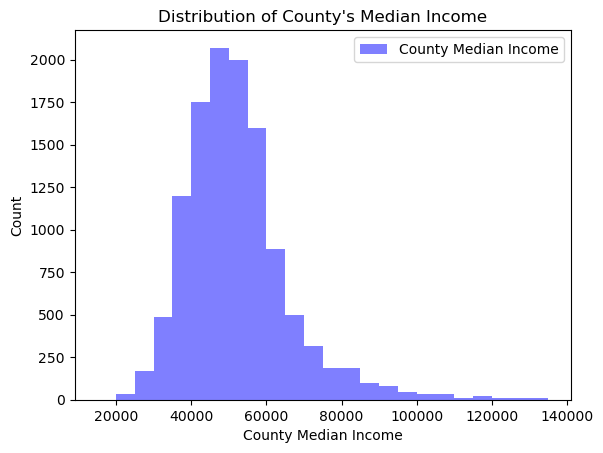

In [43]:
bins = list(range(15000, 140000, 5000))
plt.hist(df["County Median Income"], bins, alpha = 0.5, color = "blue", label = "County Median Income")
plt.xlabel("County Median Income")
plt.ylabel("Count")
plt.title("Distribution of County's Median Income")
plt.legend()

### Distribution of State Average Median Income

Text(0.5, 1.0, 'Distribution of Median Income STATE WISE')

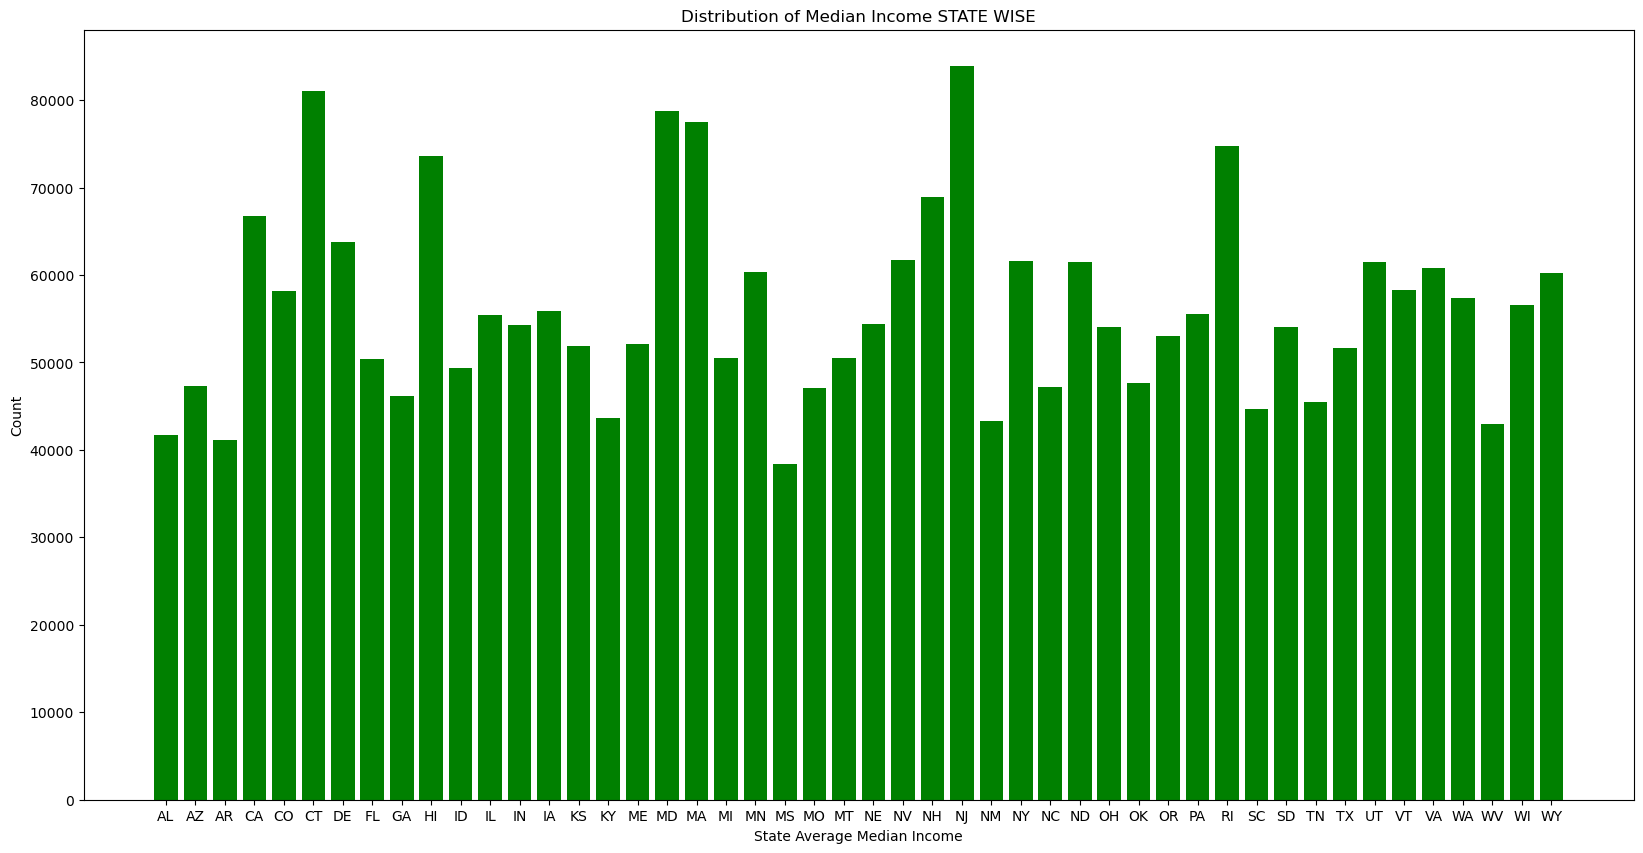

In [46]:
plt.figure(figsize = (20, 10))
plt.bar(df["State"], df["State Average Median Income"], alpha = 0.5, color = "green", label = "State Median Income", align = "center")
plt.xlabel("State Average Median Income")
plt.ylabel("Count")
plt.title("Distribution of Median Income STATE WISE")

### Summary Statistics for Education

In [47]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["% College/Associate's Degree", 
               "% Bachelor Degree", 
               "% Graduate Degree", 
               "% Only HS Degree", 
               "% less than a HS Degree"
              ]].agg(func=stats).transpose() # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

,Mean,Median,Std,Minimum,Maximum
% College/Associate's Degree,30.736011,30.622,5.095445,11.210,47.980
% Bachelor Degree,13.772744,12.768,5.486197,2.465,46.067
% Graduate Degree,7.476385,6.139,4.279798,0.580,40.300
% Only HS Degree,34.450530,34.799,7.130146,7.741,55.410
% less than a HS Degree,13.564333,12.331,6.207610,1.410,47.637


### Distribution of Education

Text(0, 0.5, 'Percent')

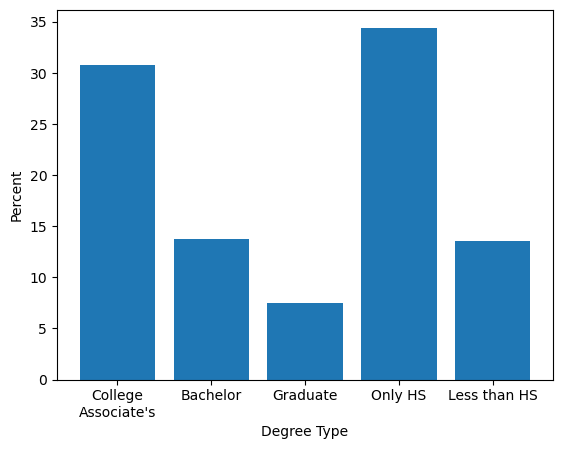

In [50]:
plt.bar(df_stats.index, df_stats["Mean"])
plt.xticks([0, 1, 2, 3, 4], ["College\nAssociate's", "Bachelor", "Graduate", "Only HS", "Less than HS"])
plt.xlabel("Degree Type")
plt.ylabel("Percent")

### Summary Statistics for Insurance

In [214]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["% Medicare Only", 
               "% Private Insurance Only", 
               "% Uninsured"
              ]].agg(func=stats).transpose() # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

,Mean,Median,Std,Minimum,Maximum
% Medicare Only,6.063525,5.789,1.914337,1.512,16.145
% Private Insurance Only,57.833914,58.309,10.414717,12.940,85.620
% Uninsured,9.989589,9.114,4.913097,1.686,42.380


In [98]:
df_stroke35 = df.loc[(df["Age Group"]=="Ages 35-64 years")&(df["Disease Type"]== "Stroke")]
df_stroke65 = df.loc[(df["Age Group"]=="Ages 65 years and older")&(df["Disease Type"]== "Stroke")]
df_stroke65.head()

df_stroke35_groupby = df_stroke35.groupby(["State"])["Mortality per 100k"].mean()
df_stroke65_groupby = df_stroke65.groupby(["State"])["Mortality per 100k"].mean()

df_stroke_35_65 = pd.merge(df_stroke35_groupby, df_stroke65_groupby, on = "State")
df_stroke_35_65.rename(columns={"Mortality per 100k_x":"Mean State Mortality per 100K for Age group 35-64 years", "Mortality per 100k_y":"Mean State Mortality per 100K for Age group 65+ years"}, inplace=True)
df_stroke_35_65

,Mean State Mortality per 100K for Age group 35-64 years,Mean State Mortality per 100K for Age group 65+ years
State,,
AL,27.794030,330.482090
AR,25.365333,287.253333
AZ,14.306667,217.760000
CA,14.778947,267.733333
CO,11.218033,228.510345
CT,8.037500,196.112500
DE,15.800000,314.733333
FL,17.452239,269.964179
GA,23.429560,305.925949


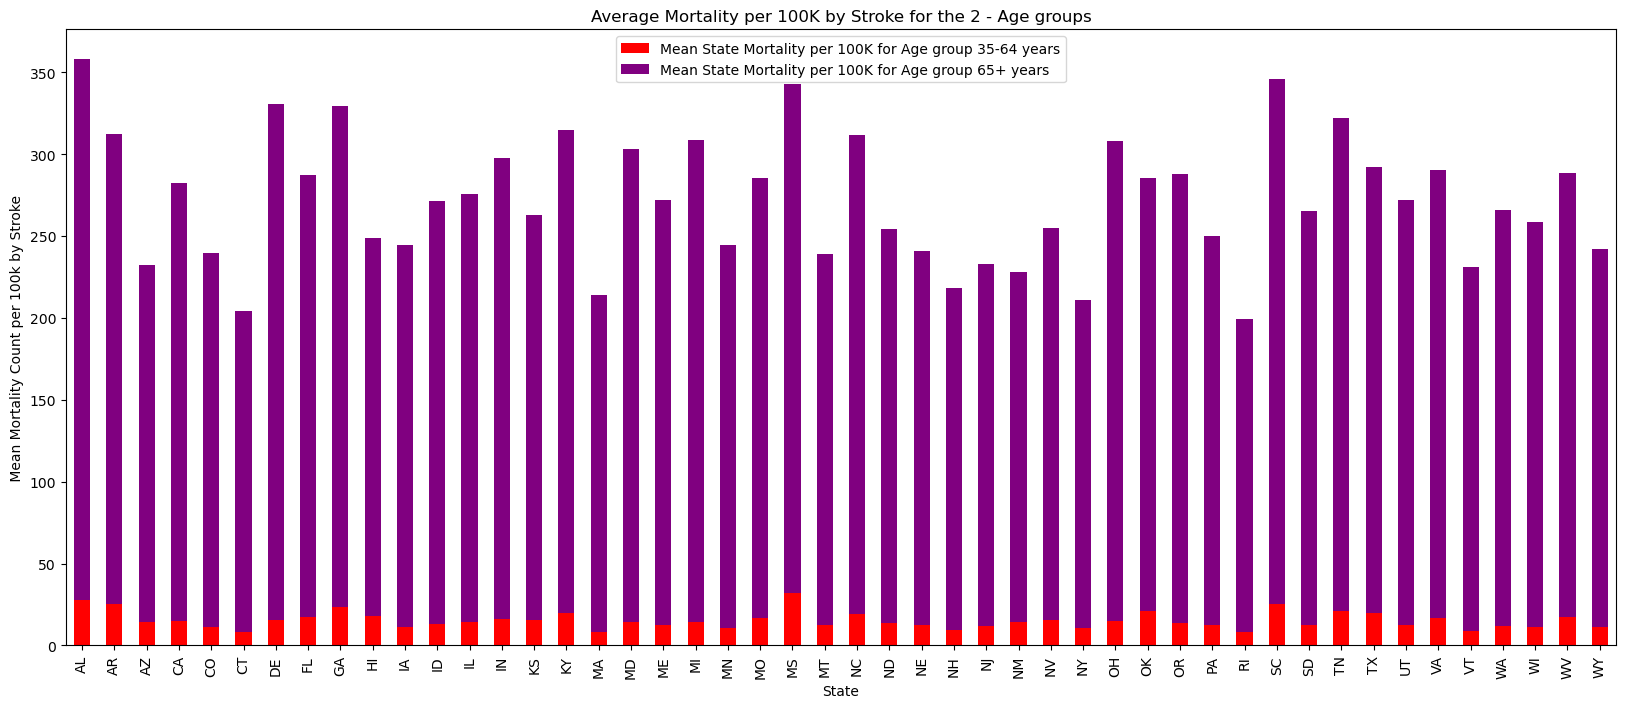

In [102]:
bar_chart_states_stroke_data = df_stroke_35_65.plot(kind = "bar", color = ["red", "purple"], figsize=(20,8), ylabel=" Mean Mortality Count per 100k by Stroke ", stacked = True)
plt.title ("Average Mortality per 100K by Stroke for the 2 - Age groups")
plt.show()

### Distribution of Insurance

Text(0, 0.5, 'Percent')

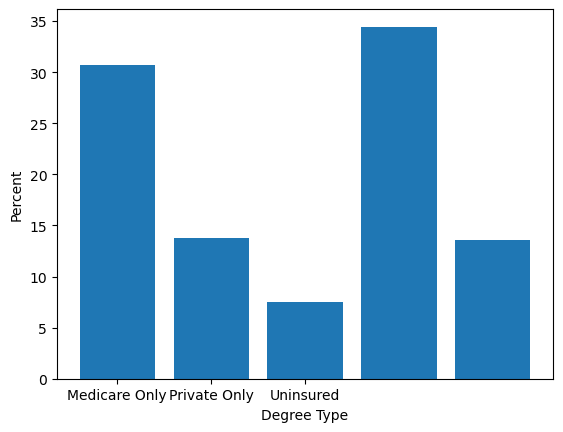

In [51]:
plt.bar(df_stats.index, df_stats["Mean"])
plt.xticks([0, 1, 2], ["Medicare Only", "Private Only", "Uninsured"])
plt.xlabel("Degree Type")
plt.ylabel("Percent")

## DataFrame Analysis: Linear Regression Equations & R-values

### Compared to Education

In [52]:
disease_type = ["Coronary Heart Disease", "Stroke"]
age_group = ["Ages 35-64 years", "Ages 65 years and older"]
education_level = ["% College/Associate's Degree", 
                   "% Bachelor Degree", 
                   "% Graduate Degree", 
                   "% Only HS Degree", 
                   "% less than a HS Degree"]

equations = []
r_values = []
educations = []
diseases = []
ages = []

for education in education_level:
    for disease in disease_type:
        for age in age_group:
            data = df[(df["Disease Type"] == disease) & (df["Age Group"] == age)].groupby("State")
            x = data[education].mean()
            y = data["Mortality per 100k"].mean()
            (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
            line_eq = str(round(slope,5)) + "x + " + str(round(intercept,2))
            row_index.append(f"{education}, {disease}, {age}")
            equations.append(line_eq)
            r_values.append(rvalue)
            educations.append(education)
            diseases.append(disease)
            ages.append(age)
            
tuples = list(zip(*[educations, diseases, ages]))
index = pd.MultiIndex.from_tuples(tuples, names=["Education Level", "Disease Type", "Age Group"])
data = {"Linear EQs": equations, "r-values": r_values}
pd.DataFrame(data = data, index = index)

NameError: name 'row_index' is not defined

### Compared to Insurance

In [126]:
disease_type = ["Coronary Heart Disease", "Stroke"]
age_group = ["Ages 35-64 years", "Ages 65 years and older"]
insurance_type = ["% Medicare Only",
                   "% Private Insurance Only",
                   "% Uninsured"]

equations = []
r_values = []
insurances = []
diseases = []
ages = []
for insurance in insurance_type:
    for disease in disease_type:
        for age in age_group:
            data = df[(df["Disease Type"] == disease) & (df["Age Group"] == age)].groupby("State")
            x = data[insurance].mean()
            y = data["Mortality per 100k"].mean()
            (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
            line_eq = str(round(slope,5)) + "x + " + str(round(intercept,2))
            row_index.append(f"{education}, {disease}, {age}")
            equations.append(line_eq)
            r_values.append(rvalue)
            insurances.append(insurance)
            diseases.append(disease)
            ages.append(age)
            
tuples = list(zip(*[insurances, diseases, ages]))
index = pd.MultiIndex.from_tuples(tuples, names=["Insurance Type", "Disease Type", "Age Group"])
data = {"Linear EQs": equations, "r-values": r_values}
pd.DataFrame(data = data, index = index)

Linear EQs  \
Insurance Type           Disease Type           Age Group                                     
% Medicare Only          Coronary Heart Disease Ages 35-64 years         12.68076x + -12.09   
                                                Ages 65 years and older  26.46224x + 453.18   
                         Stroke                 Ages 35-64 years            3.2542x + -4.01   
                                                Ages 65 years and older  14.21264x + 172.69   
% Private Insurance Only Coronary Heart Disease Ages 35-64 years         -1.70636x + 163.71   
                                                Ages 65 years and older  -3.44704x + 813.25   
                         Stroke                 Ages 35-64 years           -0.49719x + 44.6   
                                                Ages 65 years and older  -2.34226x + 395.05   
% Uninsured              Coronary Heart Disease Ages 35-64 years           2.31722x + 42.27   
                                                Ages 65 years and older   2.44275x + 588.05   
                         Stroke                 Ages 35-64 years            0.84728x + 7.68   
                                                Ages 65 years and older   4.11354x + 220.17   

                                                                         r-values  
Insurance Type           Disease Type           Age Group                          
% Medicare Only          Coronary Heart Disease Ages 35-64 years         0.583307  
                                                Ages 65 years and older  0.246151  
                         Stroke                 Ages 35-64 years         0.576479  
                                                Ages 65 years and older  0.376745  
% Private Insurance Only Coronary Heart Disease Ages 35-64 years        -0.579553  
                                                Ages 65 years and older -0.236912  
                         Stroke                 Ages 35-64 years        -0.650324  
                                                Ages 65 years and older -0.458746  
% Uninsured              Coronary Heart Disease Ages 35-64 years         0.379825  
                                                Ages 65 years and older  0.080154  
                         Stroke                 Ages 35-64 years         0.534847  
                                                Ages 65 years and older  0.384645

## Visual Analysis: Scatterplots

### Compared to Median State Income

-0.0012634987430558482
The correlation coefficient is -0.69217


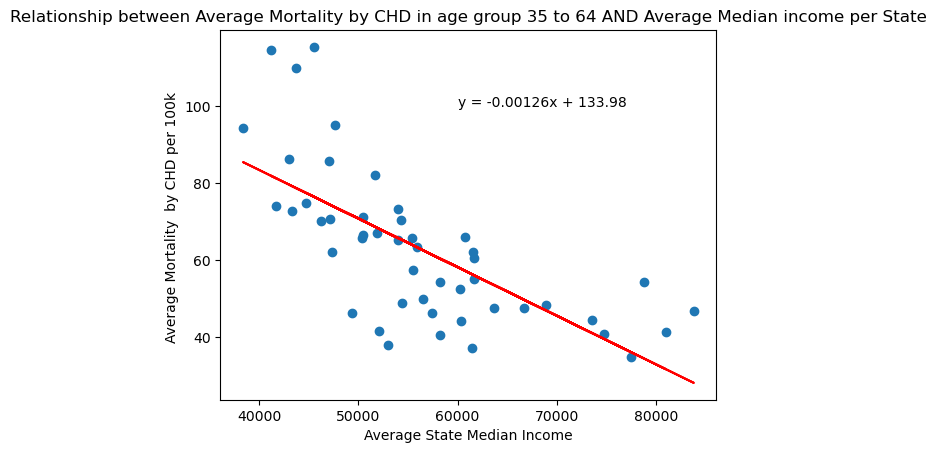

In [64]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
data.head()
x = data["State Average Median Income"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 100),fontsize=10)
plt.xlabel("Average State Median Income")
plt.ylabel("Average Mortality  by CHD per 100k ")
plt.title("Relationship between Average Mortality by CHD in age group 35 to 64 AND Average Median income per State")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-0.0028422326091878366
The correlation coefficient is -0.31189


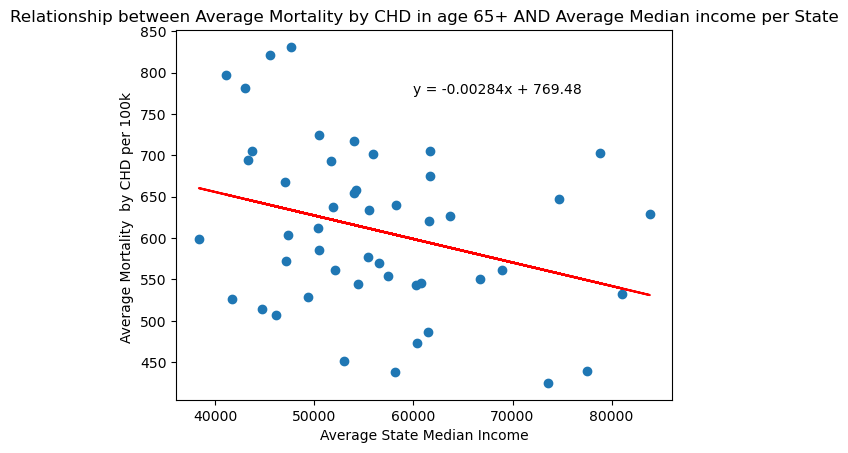

In [63]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 65 years and older")].groupby("State")
data.head()
x = data["State Average Median Income"].mean()
y = data["Mortality per 100k"].mean()
y
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 775),fontsize=10)
print(slope)
plt.xlabel("Average State Median Income")
plt.ylabel("Average Mortality  by CHD per 100k ")
plt.title("Relationship between Average Mortality by CHD in age 65+ AND Average Median income per State")
print(f"The correlation coefficient is {round(rvalue,5)}")

-0.0003043455682683757
The correlation coefficient is -0.64209


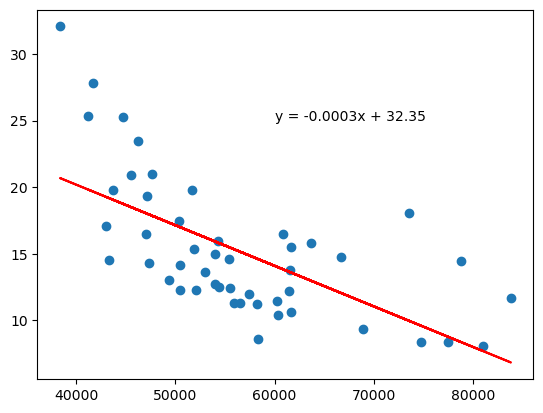

In [65]:
data = df[(df["Disease Type"] == "Stroke") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["State Median Income"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 25),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-0.0017787631274733648
The correlation coefficient is -0.55624


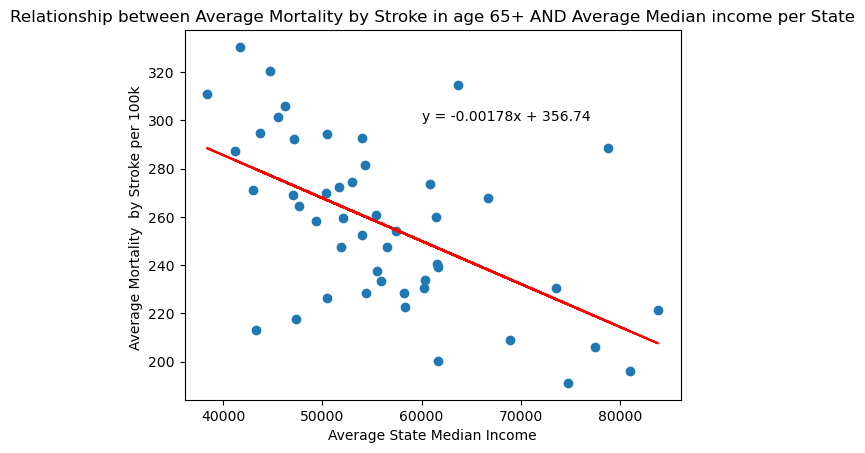

In [66]:
data = df[(df["Disease Type"] == "Stroke") & (df["Age Group"] == "Ages 65 years and older")].groupby("State")
x = data["State Average Median Income"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 300),fontsize=10)
plt.xlabel("Average State Median Income")
plt.ylabel("Average Mortality  by Stroke per 100k ")
plt.title("Relationship between Average Mortality by Stroke in age 65+ AND Average Median income per State")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-1.4560596766799234
The correlation coefficient is -0.29065


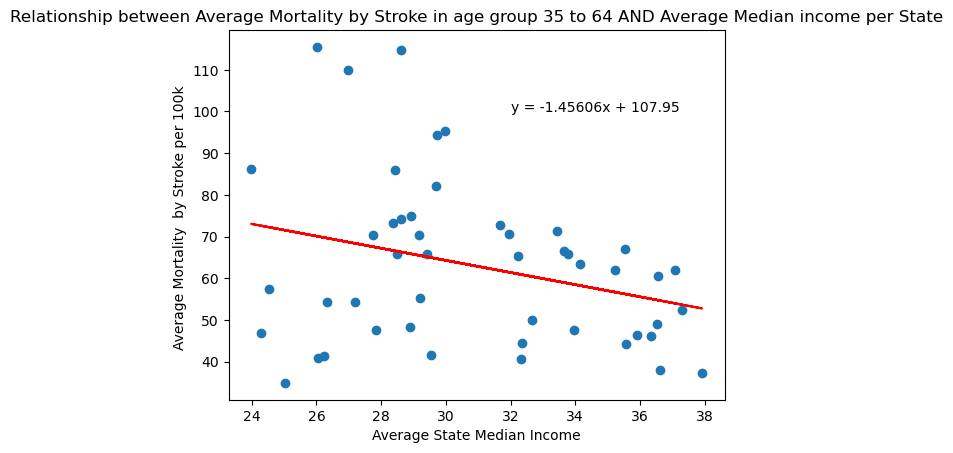

In [68]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% College/Associate's Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (32, 100),fontsize=10)
plt.xlabel("Average State Median Income")
plt.ylabel("Average Mortality  by Stroke per 100k ")
plt.title("Relationship between Average Mortality by Stroke in age group 35 to 64 AND Average Median income per State")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-4.387035071485798
The correlation coefficient is -0.78143


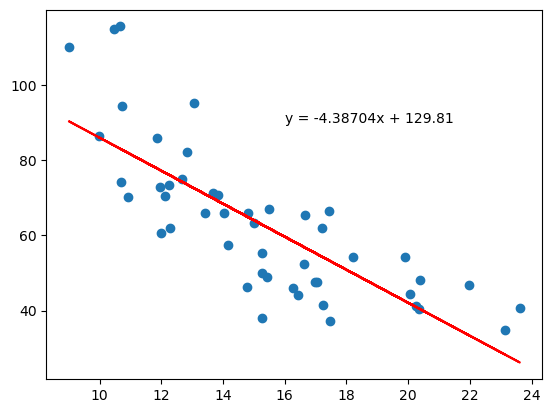

In [79]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% Bachelor Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (16, 90),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-3.763366067545003
The correlation coefficient is -0.59292


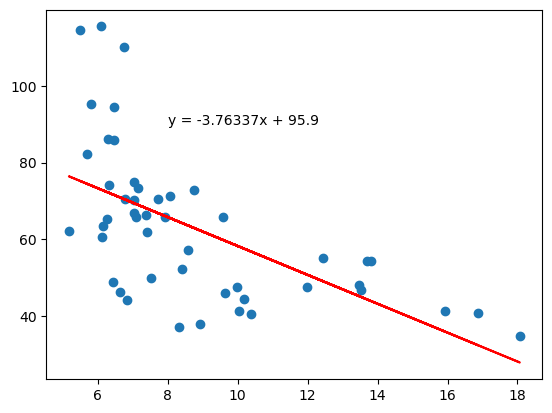

In [77]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% Graduate Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (8, 90),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

2.955469250985867
The correlation coefficient is 0.68304


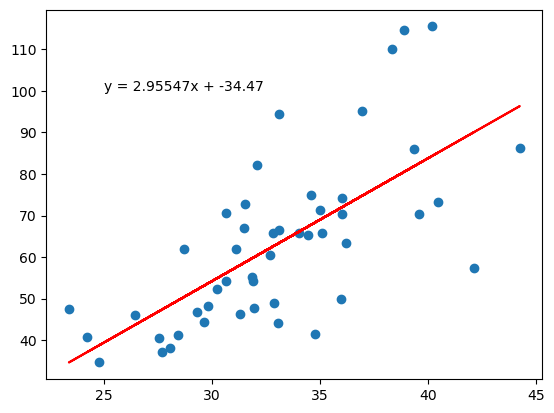

In [75]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% Only HS Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (25, 100),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

3.9277919900722575
The correlation coefficient is 0.72213


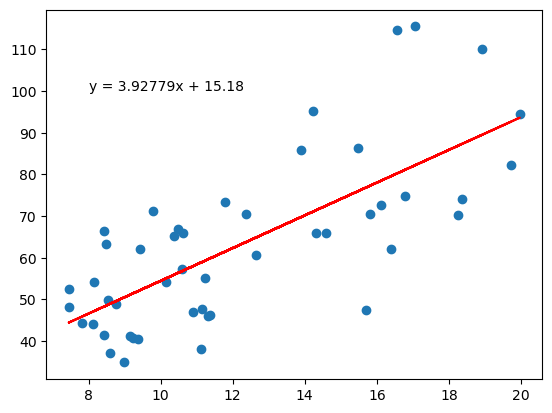

In [74]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% less than a HS Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (8, 100),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

## Quartlies Ranges for Disease type " CHD" amd age group 35-64

In [88]:
df_quartile_35= df.loc[(df["Age Group"]== "Ages 35-64 years") & (df["Disease Type"]== "Coronary Heart Disease")]
df_quartile_35_groupby_state = df_quartile_35.groupby("State", as_index=False)["Mortality per 100k"].mean()
df_quartile_35_groupby_state

,State,Mortality per 100k
0,AL,74.156716
1,AR,114.700000
2,AZ,62.020000
3,CA,47.568421
4,CO,40.516393
5,CT,41.262500
6,DE,47.633333
7,FL,65.868657
8,GA,70.294340
9,HI,44.425000


In [87]:
quartiles = df_quartile_35_groupby_state['Mortality per 100k'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Mortality per 100K is: {lowerq}")
print(f"The upper quartile of Mortality per 100K is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of Mortality is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Mortality per 100K is: 47.39298245614035
The upper quartile of Mortality per 100K is: 71.63455823293172
The interquartile range of occupancy is: 24.24157577679137
The the median of Mortality is: 62.036 
Values below 11.030618790953291 could be outliers.
Values above 107.99692189811879 could be outliers.


0      74.156716
1     114.700000
2      62.020000
3      47.568421
4      40.516393
5      41.262500
6      47.633333
7      65.868657
8      70.294340
9      44.425000
10     63.355556
11     46.245238
12     65.816667
13     70.477174
14     66.942308
15    110.032500
16     34.864286
17     54.229167
18     41.450000
19     71.263855
20     44.196552
21     85.906957
22     94.403659
23     66.408163
24     70.613000
25     62.052000
26     48.905000
27     48.190000
28     46.866667
29     72.746667
30     60.606667
31     55.211290
32     73.262500
33     95.200000
34     38.025714
35     57.302985
36     40.780000
37     74.923913
38     65.304688
39    115.494737
40     82.179012
41     37.237037
42     65.903030
43     54.264286
44     46.120513
45     49.940278
46     86.278182
47     52.395652
Name: Mortality per 100k, dtype: float64


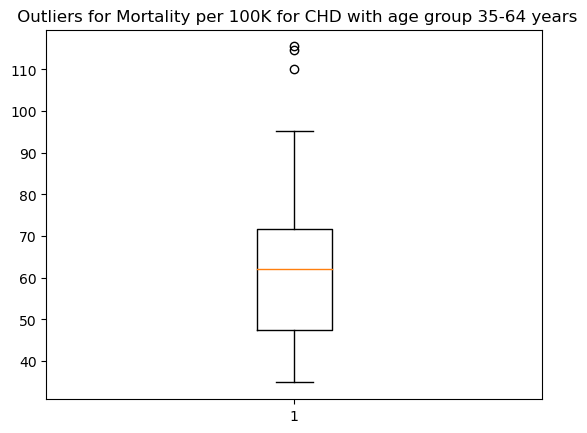

In [103]:
Mortality= df_quartile_35_groupby_state["Mortality per 100k"]
print(Mortality)
fig1, ax1 =plt.subplots()
plt.title(" Outliers for Mortality per 100K for CHD with age group 35-64 years")
ax1.boxplot(Mortality)
plt.show()